<a href="https://colab.research.google.com/github/krishyadav007/COTM-August/blob/main/Copy_of_COTM_AUG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (34.6 MB)


In [ ]:
import pandas_profiling
import pandas as pd
from scipy import sparse

In [ ]:
df = pd.read_csv('test.csv', error_bad_lines=False)
profile = pandas_profiling.ProfileReport(df, title="Pandas Profiling Report")

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

AttributeError: ignored

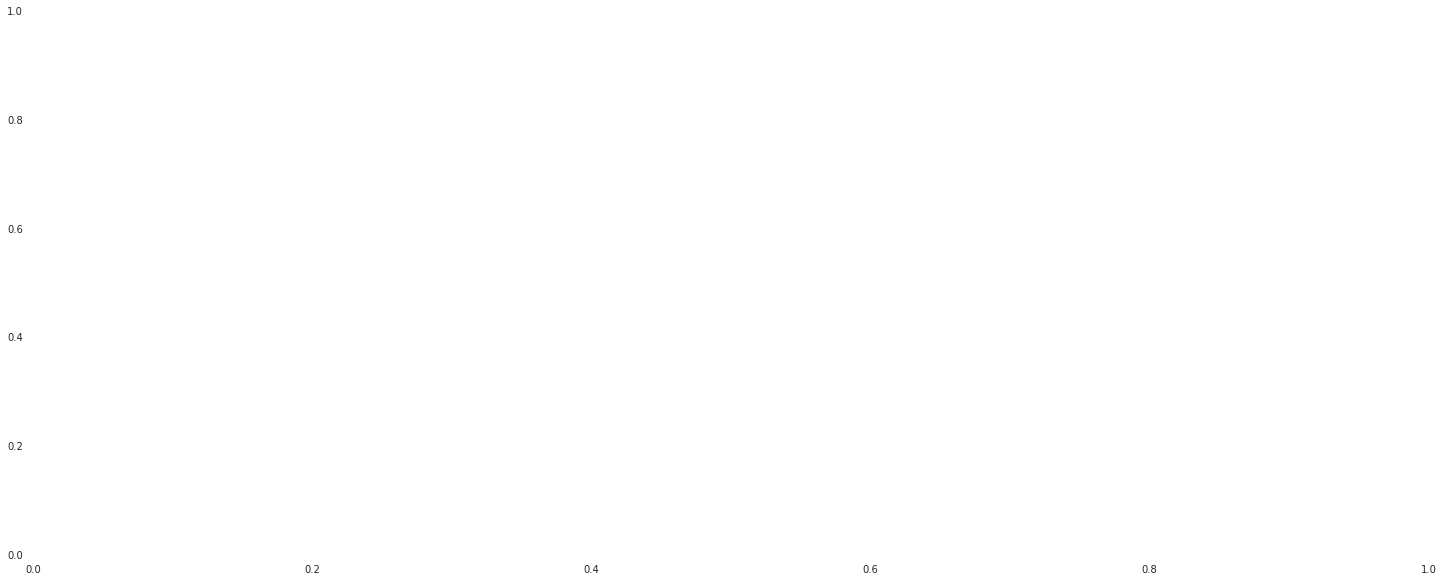

In [ ]:
profile

In [ ]:
print(df.head())
print(df.info())
print(df.isnull().sum())
df =df.fillna(df.mean())
print(df.isnull().sum())

     TV      Radio  Social Media Influencer       Sales
0  16.0   6.566231      2.907983       Mega   54.732757
1  13.0   9.237765      2.409567       Mega   46.677897
2  41.0  15.886446      2.913410       Mega  150.177829
3  83.0  30.020028      6.922304       Mega  298.246340
4  15.0   8.437408      1.405998      Micro   56.594181
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB
None
TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64
TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Models = {}

In [ ]:
X = df.loc[:, 'TV'].values.reshape(-1, 1) # values converts it into a numpy array
Y = df.loc[:, 'Sales'].values.reshape(-1, 1) # -1 means that calculate the dimension of rows, but have 1 column
Models['TV_SALES_LR'] = LinearRegression()
Models['TV_SALES_LR'].fit(X, Y)
Y_pred = Models['TV_SALES_LR'].predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print("The MSE score is : " + str(mean_squared_error(Y,Y_pred)))

AttributeError: ignored

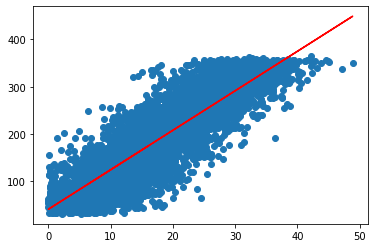

The MSE score is : 2144.9536586138124


In [ ]:
X = df.loc[:, 'Radio'].values.reshape(-1, 1) # values converts it into a numpy array
Y = df.loc[:, 'Sales'].values.reshape(-1, 1) # -1 means that calculate the dimension of rows, but have 1 column
Models['Radio_SALES_LR'] = LinearRegression()
Models['Radio_SALES_LR'].fit(X, Y)
Y_pred = Models['Radio_SALES_LR'].predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print("The MSE score is : " + str(mean_squared_error(Y,Y_pred)))

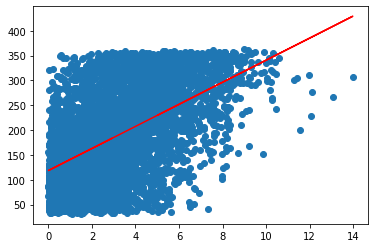

The MSE score is : 6244.981337530377


In [ ]:
X = df.loc[:, 'Social Media'].values.reshape(-1, 1) # values converts it into a numpy array
Y = df.loc[:, 'Sales'].values.reshape(-1, 1) # -1 means that calculate the dimension of rows, but have 1 column
Models['Social_Media_SALES_LR'] = LinearRegression()
Models['Social_Media_SALES_LR'].fit(X, Y)
Y_pred = Models['Social_Media_SALES_LR'].predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print("The MSE score is : " + str(mean_squared_error(Y,Y_pred)))

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

# df = pd.get_dummies(df, columns=["Influencer"]).head()
df = df.drop(['Influencer'], axis = 1)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X.columns = ['f0', 'f1', 'f2']

# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
  
# Instantiation
Models["XGB"] = xg.XGBRegressor(
    objective="reg:squarederror",
    n_estimators = 10,
    seed = 42)
  
# Fitting the model
Models["XGB"].fit(train_X, train_y)
  
# Predict the model
pred = Models["XGB"].predict(test_X)
  
# MSE Computation
rmse = MSE(test_y, pred)
print("MSE : % f" %(rmse))

KeyError: ignored

In [ ]:
print(test_X)

        f0         f1        f2
2595  15.0   0.233438  0.443925
1445  83.0  29.048907  1.976047
4395  65.0  22.220925  5.664413
550   31.0  14.300824  2.954929
3242  50.0  17.637288  1.085354
...    ...        ...       ...
3659  47.0  12.914930  1.829351
2271  53.0  18.979564  2.374604
568   75.0  20.771190  1.930360
2070  51.0  18.073107  5.706994
2703  39.0  14.016952  3.105425

[1372 rows x 3 columns]


In [ ]:
#@title Choose your model { run: "auto" }
Model = 'XGB' #@param ["TV_SALES_LR", "Radio_SALES_LR", "Social_Media_SALES_LR", "XGB"]
TV =  55#@param {type:"integer"}
Radio =  00#@param {type:"integer"}
Social_Media =  800#@param {type:"integer"}
# Model = 'XGB' #@param ["TV_SALES_LR", "Radio_SALES_LR", "Social_Media_SALES_LR", "XGB"]

if Model == "XGB":
  print("Probable sales is : " + str(Models["XGB"].predict([[TV, Radio, Social_Media]])[0]))
elif Model == "TV_SALES_LR":
  print("Probable sales is : " + str(Models['TV_SALES_LR'].predict([[TV]])[0][0]))
elif Model == "Radio_SALES_LR":
  print("Probable sales is : " + str(Models['Radio_SALES_LR'].predict([[Radio]])[0][0]))
elif Model == "Social_Media_SALES_LR":
  print("Probable sales is : " + str(Models['Social_Media_SALES_LR'].predict([[Social_Media]])[0][0]))
else :
  print("Something went wrong")

Probable sales is : 129.45111
